# Code of "What gives your Airbnb a high rating?" project
Three business questions:  
1.Does the description of the listing affect the rating score?  
2.Does the description of the neighborhood affect the rating score?  
3.What are the objective factors affect the rating most?

In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

# import dataset
df_listings = pd.read_csv('./listings.csv')

In [ ]:
# run this cell to take a look at the first 5 rows of the data
df_listings.head()

The whole project cares about what affects the **rating scores** of a Airbnb listing, so the first step is deleting the listings with missing values in **'review_score_rating'**.

In [181]:
df_new = df_listings.dropna(subset = ['review_scores_rating'], axis = 0)

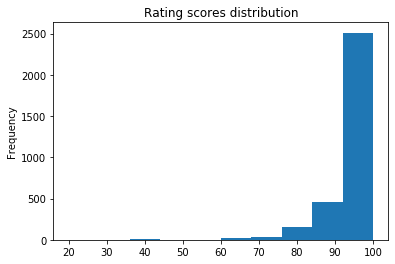

In [182]:
# run this cell to take a look at the ditribution of the rating scores of all the Airbnb listings in Seattle.
df_new.review_scores_rating.plot(kind = 'hist');
plt.title('Rating scores distribution');

### Comparing high rating score listings vs low rating score listings
I will first compare whether the Airbnb listings have higher rating scores are different from those with lower scores in some subjective factors -- such as how they describe the listing and the neighborhood (Question 1 & 2).   

To have two groups to compare, I extract those listings with higher scores (> 75% percentile) and lower scores(< 25% percentile).

## Solving Question 1
To simplify the question, I will only focus on the **adjectives** used in the descriptions.  

By looking through the descriptions in column **'description'** (a desciption of the Airbnb listing), I got some possible adjectives listing in the following variable **possible_adj**.

In [69]:
# We don't have NaN value in the 'description' variable
df_new.description.isnull().sum()

0

In [7]:
# separate data directly
df_high_score = df_new[y > np.percentile(y,75)]
df_low_score  = df_new[y < np.percentile(y,25)]

In [8]:
possible_adj = ['charming', 'private', 'elegant', 'cozy', 'comfortable', 
                'clean', 'wonderful', 'beautiful', 'modern', 'great',
                'functional', 'fresh', 'close', 'historic', 'quiet',
                'gorgeous', 'safe', 'convenient', 'lovely', 'vintage',
                'amazing', 'walkable', 'adorable', 'bright', 'light',
                'new', 'spacious', 'large', 'desirable', 'popular', 
                'special', 'fantastic', 'fabulous']

Here I use (modify) a code from Udacity class to count the number of above words showing in a column of a dataframe.

In [18]:
def count_word(df, col1, col2, look_for):
    '''
    Modified based on code from Udacity Data Scientist Nanodegree Lession 1. 
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col1]
    
    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            if val in df[col1][idx].lower():
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

The following function preprocess the dataframe you want to use and count the words (e.g. adjectives) of interest by calling the **count_word** function.

In [26]:
def get_count(df, col = 'description', search_for = possible_adj):
    '''
    Modified based on code from Udacity Data Scientist Nanodegree Lession 1.
    '''
    df_group = df[col].value_counts().reset_index()
    df_group.rename(columns={'index': 'key_words', col: 'count'}, inplace=True)
    df_key_word = count_word(df_group, 'key_words', 'count', search_for)
    
    df_key_word.set_index('key_words', inplace = True)
    return df_key_word

Text(0.5, 1.0, 'Low rating listings usage of adjectives in description')

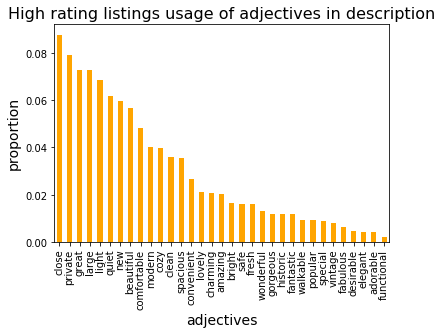

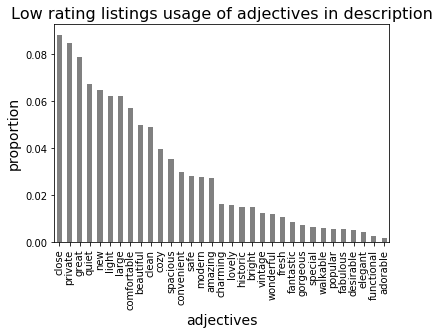

In [46]:
# plot out the adjective usage in high score listings and low score listings
adj_high      = get_count(df_high_score)
adj_low       = get_count(df_low_score)
prop_adj_high = adj_high/adj_high.sum()
prop_adj_low  = adj_low/adj_low.sum()

ax[0] = prop_adj_high.plot(kind = 'bar', legend = None, color = 'orange')
ax[0].set_xlabel('adjectives', fontsize = 14)
ax[0].set_ylabel('proportion', fontsize = 14)
ax[0].set_title('High rating listings usage of adjectives in description', fontsize = 16)
ax[1] = prop_adj_low.plot(kind = 'bar', legend = None, color = 'grey')
ax[1].set_xlabel('adjectives', fontsize = 14)
ax[1].set_ylabel('proportion', fontsize = 14)
ax[1].set_title('Low rating listings usage of adjectives in description', fontsize = 16)

### Answer of Question 1
It seems there is no huge difference in the adjective usage in the descriptions between high rating score listings and low rating score listings -- at least the top three adjectives are the same between two groups.   

Other adjectives might have different order in the usage proportion, but not far from each other between these two groups. 

## Solving Question 2
Next, I will explore whether the **description of the neighborhood** (column **'neighborhood_overview'**) affects the rating score.  

Similar to question 1, I will compare the adjectives usage between high rating listings and low rating listings.

In [71]:
# There are NaN values in 'neighborhood_overview'
df_new.neighborhood_overview.isnull().sum()

738

In [72]:
# Delete rows with NaN in 'neighborhood_overview'
df_q2 = df_new.dropna(subset = ['neighborhood_overview'], axis = 0)

In [75]:
# separate data into high rating group and low rating group
df2_high_score = df_q2[df_q2.review_scores_rating > np.percentile(y,75)]
df2_low_score  = df_q2[df_q2.review_scores_rating < np.percentile(y,25)]

In [76]:
# use get_count funtion to sort out the adjective usage
adj_high_neighbor      = get_count(df2_high_score, col = 'neighborhood_overview')
adj_low_neighbor       = get_count(df2_low_score, col = 'neighborhood_overview')
prop_adj_high_neighbor = adj_high_neighbor/adj_high_neighbor.sum()
prop_adj_low_neighbor  = adj_low_neighbor/adj_low_neighbor.sum()

Text(0.5, 1.0, 'Low rating listings usage of adjectives in neighborhood overview')

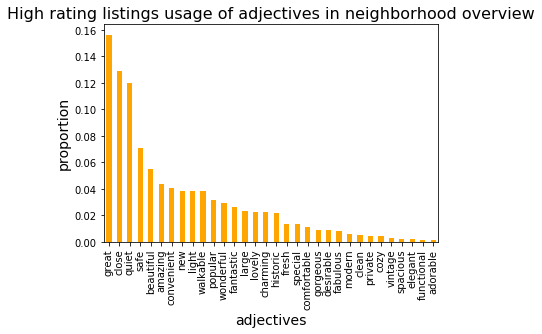

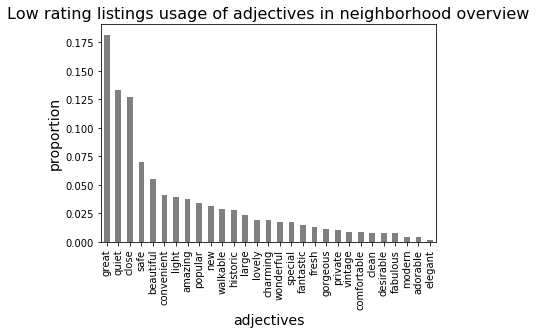

In [77]:
ax[0] = prop_adj_high_neighbor.plot(kind = 'bar', legend = None, color = 'orange')
ax[0].set_xlabel('adjectives', fontsize = 14)
ax[0].set_ylabel('proportion', fontsize = 14)
ax[0].set_title('High rating listings usage of adjectives in neighborhood overview', fontsize = 16)
ax[1] = prop_adj_low_neighbor.plot(kind = 'bar', legend = None, color = 'grey')
ax[1].set_xlabel('adjectives', fontsize = 14)
ax[1].set_ylabel('proportion', fontsize = 14)
ax[1].set_title('Low rating listings usage of adjectives in neighborhood overview', fontsize = 16)

Again, it seems the adjectives used in neighborhood overview between these two groups are not quite different from each other. And the top three adjectives are the same in the description of listings.  

Another factor of the description of neighborhood is nouns related to the entertainment and daily life, such as "shopping" and "coffee". By looking through the column **'neighborhood_overview'** I extract some daily life related noun in the variable **possible_noun**.  

I will plot out the noun usage between high rating score listings and low rating score listings.

In [49]:
possible_noun = ['restaurants', 'food', 'bars', 'coffee', 'cafes', 'shopping', 'music', 'mall', 'park', 'grocery', 'moive']

In [50]:
# use get_count funtion to sort out the noun usage
n_high_neighbor      = get_count(df_high_score, col = 'neighborhood_overview', search_for = possible_noun)
n_low_neighbor       = get_count(df_low_score, col = 'neighborhood_overview', search_for = possible_noun)
prop_n_high_neighbor = n_high_neighbor/n_high_neighbor.sum()
prop_n_low_neighbor  = n_low_neighbor/n_low_neighbor.sum()

Text(0.5, 1.0, 'Low rating listings usage of nouns in neighborhood overview')

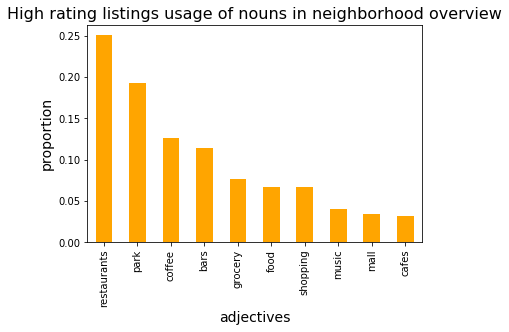

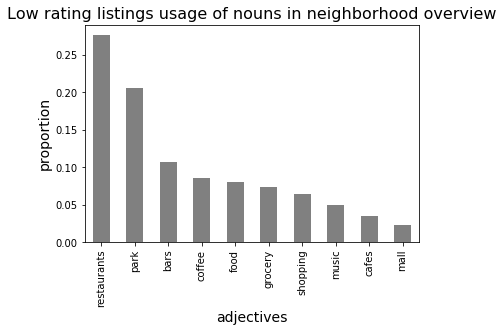

In [51]:
ax[0] = prop_n_high_neighbor.plot(kind = 'bar', legend = None, color = 'orange')
ax[0].set_xlabel('adjectives', fontsize = 14)
ax[0].set_ylabel('proportion', fontsize = 14)
ax[0].set_title('High rating listings usage of nouns in neighborhood overview', fontsize = 16)
ax[1] = prop_n_low_neighbor.plot(kind = 'bar', legend = None, color = 'grey')
ax[1].set_xlabel('adjectives', fontsize = 14)
ax[1].set_ylabel('proportion', fontsize = 14)
ax[1].set_title('Low rating listings usage of nouns in neighborhood overview', fontsize = 16)

It seems subjective factors did not affect the review score rating. The next step is to explore the objective factors.

## Solving Question 3

All the objective factors of interests include: 

**Quantitive variables:**  
1) 'accommodates'  
2) 'bathrooms'  
3) 'bedrooms'  
4) 'amenities': I will use the complexity of the amenities, i.e. how many amenities are listed  
5) 'price': I will use price per person, so it will be divided by accommodates first  
6) 'security_deposit'  
7) 'cleaning_fee'  

**Categorical variables:**  
1) 'host_response_time': within an hour, within a few hours, within a day, a few days or more  
2) 'host_is_superhost': whether the host is a superhost or not, boolean variable  
3) 'host_has_profile_pic': whether the host provides a profile picture or not, boolean variable  
4) 'host_identity_verified': whether the host's identity is verified or not  
5) 'is_location_exact': whether the location provided is accurate or not  
6) 'room_type': entire home/apt, private room, shared room  
7) 'bed_type': real bed, futon, pull_out sofa, airbed, couch  
8) 'cancellation_policy': strict, moderate, flexible  
9) 'instant_bookable': boolean  
10) 'require_guest_profile_picture': boolean  
11) 'require_guest_phone_verification': boolean  

**Special varibales:** whether the row is null or not is the information we care about.  
1) 'transit': whether transportation method is provided  
2) 'host_about': whether the host provides self introduction  

In [ ]:
# use this cell to take a look at what variables have NaN values
df_new.isnull().sum().sort_values(ascending=False)

### Dealing with NaN

In [183]:
# for 'bathrooms' and we will replace the NaN by 1 (it is reasonable to assume that each Airbnb listing has at least 1 bathroom)
df_new['bathrooms'].fillna(1);

In [185]:
# for 'bedrooms', assumming that 1 bedroom can have 2 accommodates, I will replace the NaN in 'bedrooms' by (accommodates/2) for a given row
df_new['bedrooms'].fillna(df_new.accommodates/2, inplace = True)

In [186]:
# for 'security_deposit' and 'cleaning_fee', replace NaN by $0, then clean the data format to make them into float
df_new.fillna(value = {'security_deposit': '$0', 'cleaning_fee': '$0'}, inplace=True)

df_new.security_deposit = df_new.security_deposit.str.lstrip('$');
df_new.cleaning_fee = df_new.cleaning_fee.str.lstrip('$');
df_new.security_deposit = df_new.security_deposit.str.replace(',', '').astype(float)
df_new.cleaning_fee     = df_new.cleaning_fee.str.replace(',', '').astype(float)

In [187]:
# for 'transit' and 'host_about', use NaN information to recode them into 1 = provided (not NaN) and 0 = not provided (is NaN)
df_new.transit    = df_new.transit.notnull().astype(int)
df_new.host_about = df_new.host_about.notnull().astype(int)

In [191]:
# for 'host_response_time', I will delete rows with NaN
df_new = df_new.dropna(subset = ['host_response_time'], axis = 0)

### Convert categorical variables to dummy variables, recode boolean variables to '1 vs 0'

In [200]:
df_new.require_guest_phone_verification

0       f
1       t
2       f
4       f
6       f
7       t
9       t
10      f
11      f
12      f
13      f
14      f
15      f
16      f
17      f
20      f
21      f
22      f
25      f
27      t
28      f
29      f
30      t
31      f
32      f
33      f
34      f
35      f
36      f
37      f
       ..
3782    f
3783    f
3784    f
3785    f
3786    t
3787    f
3788    f
3789    f
3790    f
3791    f
3793    f
3794    f
3795    f
3796    f
3797    f
3798    f
3799    f
3801    f
3803    f
3804    f
3805    f
3806    f
3807    f
3808    f
3809    f
3810    f
3811    f
3812    t
3813    f
3814    f
Name: require_guest_phone_verification, Length: 2859, dtype: object